In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from plot_module import plot_network

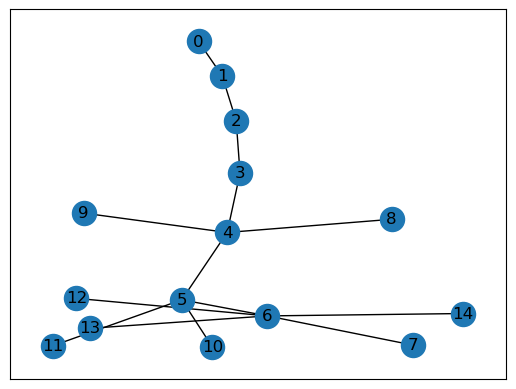

In [2]:
G = nx.random_powerlaw_tree(15, gamma = 5, tries =100000)
nx.draw_networkx(G)

In [3]:
leaf_nodes = [x for x in G.nodes() if G.degree(x)==1]; leaf_nodes = leaf_nodes[1:]
print(leaf_nodes)
branch_nodes = [x for x in G.nodes() if any(y in leaf_nodes for y in nx.descendants_at_distance(G, x, 1))]
print(branch_nodes)


[7, 8, 9, 10, 11, 12, 13, 14]
[4, 5, 6]


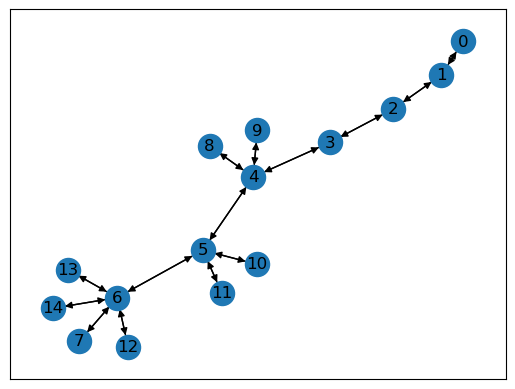

In [4]:
H = G.to_directed()
nx.draw_networkx(H)

out_edge = [e for e in H.edges() if e[0]<e[1]]
in_edge = [e for e in H.edges() if e[0]>e[1]]

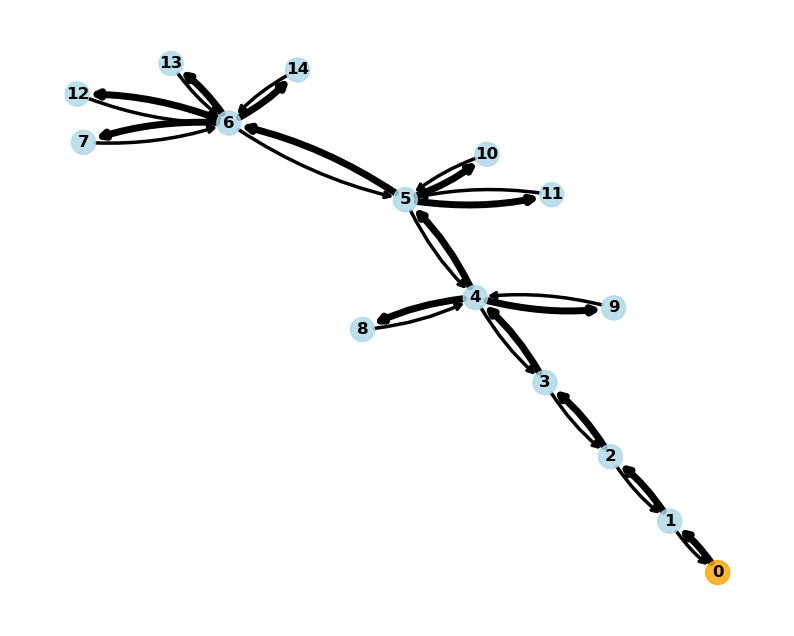

In [5]:
out_rate = 0.1
in_rate = 0.05
nx.set_node_attributes(H, 0, "birth_type")
nx.set_node_attributes(H, {0:2}, "birth_type")
nx.set_edge_attributes(H, {e:out_rate for e in out_edge}, "rate")
nx.set_edge_attributes(H, {e:in_rate for e in in_edge}, "rate")
plot_network(H)